<a href="https://colab.research.google.com/github/hardikdwivedi17/toxicity/blob/main/toxicity%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
np.expand_dims??

In [ ]:
df = pd.read_csv('/content/train.csv (1).zip')

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [ ]:
df.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [ ]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
x=df['comment_text']
y=df[df.columns[2:]].values

In [ ]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
x

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
MAX_WORDS = 200000

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,output_sequence_length=1800,output_mode='int')

In [ ]:
TextVectorization??

In [ ]:
vectorizer.adapt(x.values)

In [ ]:
vectorizer('hello world,life is great')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288,   1,   9, ...,   0,   0,   0])>

In [ ]:
vectorizer.get_vocabulary

<bound method TextVectorization.get_vocabulary of <keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f0cf873f9d0>>

In [ ]:
vectorized_text= vectorizer(x.values)

In [ ]:
len(x)

159571

In [ ]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
# MCSHBAP - map ,cache,batch,prefetch from_tensor_slices,li
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(20)
dataset = dataset.prefetch(10) #helps bottlenecks

In [ ]:
dataset.as_numpy_iterator().next()

(array([[97720,  1387,  3951, ...,     0,     0,     0],
        [11270, 23867,   744, ...,     0,     0,     0],
        [  118, 50280,   200, ...,     0,     0,     0],
        ...,
        [ 4446,   975,     7, ...,     0,     0,     0],
        [   70,    15,  2893, ...,     0,     0,     0],
        [   27,     8,    99, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0]]))

In [ ]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [ ]:
batch_x.shape

(20, 1800)

In [ ]:
batch_y.shape

(20, 6)

In [ ]:
len(dataset)*.7

5585.299999999999

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
len(train)

5585

In [ ]:
len(test)

797

In [ ]:
train.as_numpy_iterator().next()

(array([[    8,   253,    22, ...,     0,     0,     0],
        [ 5241, 17541,   127, ...,     0,     0,     0],
        [    2,  1345,  1298, ...,     0,     0,     0],
        ...,
        [   24,     9,  1868, ...,     0,     0,     0],
        [    2, 11156, 16449, ...,     0,     0,     0],
        [    2,  2306,  2682, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# **Create Sequential Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# create the embedding layer
model.add(Embedding(MAX_WORDS+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# feature extractor fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# final layer
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [ ]:
history = model.fit(train,epochs=5,validation_data = val)

Epoch 1/5
5585/5585 [==============================] - 688s 122ms/step - loss: 0.0628 - val_loss: 0.0464
Epoch 2/5
5585/5585 [==============================] - 605s 108ms/step - loss: 0.0458 - val_loss: 0.0378
Epoch 3/5
5585/5585 [==============================] - 604s 108ms/step - loss: 0.0409 - val_loss: 0.0348
Epoch 4/5
5585/5585 [==============================] - 601s 108ms/step - loss: 0.0358 - val_loss: 0.0333
Epoch 5/5
5585/5585 [==============================] - 603s 108ms/step - loss: 0.0323 - val_loss: 0.0285


In [ ]:
history.history

{'loss': [0.0628216341137886,
  0.045798398554325104,
  0.040865931659936905,
  0.035825807601213455,
  0.032308902591466904],
 'val_loss': [0.046447575092315674,
  0.03776185214519501,
  0.03483424335718155,
  0.033295419067144394,
  0.028526531532406807]}

In [ ]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

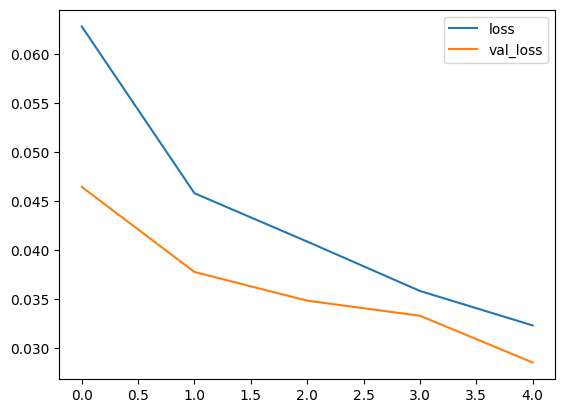

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# **Make Prediction**

In [ ]:
input_text=vectorizer('you freaking suck!')

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
batch=test.as_numpy_iterator().next()

In [ ]:
batch_x,batch_y=test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_x)>0.5).astype(int)

1/1 [==============================] - 1s 813ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res=model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 122ms/step


# **Evaluate Model**

In [ ]:
from tensorflow.keras.metrics import Precision , Recall , CategoricalAccuracy

In [ ]:
pre = Precision()
re= Recall()
acc= CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # unpack the batch....
    x_true,y_true=batch
    # make a prediction ..
    yhat=model.predict(x_true)
    # flatten the predictions
    y_true=y_true.flatten()
    yhat=yhat.flatten()

    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 53ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 0.8858576416969299,Recall:0.7971218824386597,Accuracy:0.4968632459640503


# **Test And gradio Application for better interaction**

In [119]:
pip install --upgrade typer

In [120]:
!pip install gradio

In [121]:
import tensorflow as tf
import gradio as gr

In [122]:
model.save('toxicity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [123]:
model = tf.keras.models.load_model('toxicity.h5')

In [124]:
input_str=vectorizer('that man is black , i will not give him job')

In [125]:
res=model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 1s/step


In [126]:
res

array([[0.307139  , 0.00064154, 0.00800051, 0.0113778 , 0.02716356,
        0.01544155]], dtype=float32)

In [127]:
df.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [128]:
def score_comment(comment):
   vectorized_comment=vectorizer([comment])
   results=model.predict(vectorized_comment)

   text=''
   for idx,col in enumerate(df.columns[2:]):
       text += '{}:{}\n'.format(col,results[0][idx]>0.3)

   return text

In [129]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                         outputs='text')


In [130]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1efb6e97f4e3466db3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
